In [4]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re 


In [5]:
#read files
res = pd.read_csv('02_FINAL_alldata.csv')
df_michelin = pd.read_excel("01_Get_Michelin_List.xlsx")
df = pd.read_csv('03_FINAL_sentiment.csv')

# Data cleaning

In [6]:
#apply michelin Restaurants to the dataframe (1 for yes, 0 for no)
michelin_list = df_michelin['Name'].tolist()
all_list = res['name'].tolist()

def michelin(name):
    if name in michelin_list:
        return 1
    else:
        return 0

res['Michelin'] = res['name'].apply(michelin)
#get michelin restaurant list
res_mich = res[res['Michelin']>0]


# Exploratory Data Analysis

# #Restaurants Distribution

Distrubution by category

In [7]:
# get the categories 
c = res['category'].tolist()
cm = res_mich['category'].tolist()

In [8]:
#put categories into a dictionary with frequency
def get_category_frequency(x):
    category = []
    freq = {}
    for i in range(len(x)):
        category += re.findall(r'\w+\s?\w+',x[i])
    for item in category: 
        if (item in freq):
            freq[item] += 1
        else: 
            freq[item] = 1
    
    return freq

In [15]:
a = get_category_frequency(c).items()
a=list(a)
a

[('Seafood', 268),
 ('Wine Bars', 139),
 ('Beer Bar', 57),
 ('French', 122),
 ('American', 852),
 ('Traditional', 358),
 ('Gastropubs', 69),
 ('Italian', 342),
 ('Pasta Shops', 9),
 ('Thai', 109),
 ('Malaysian', 9),
 ('Vietnamese', 93),
 ('Shanghainese', 9),
 ('Comfort Food', 49),
 ('Southern', 75),
 ('Cocktail Bars', 285),
 ('Steakhouses', 108),
 ('Burgers', 172),
 ('New', 494),
 ('Desserts', 85),
 ('Pizza', 201),
 ('Korean', 142),
 ('Tapas', 75),
 ('Small Plates', 75),
 ('Moroccan', 10),
 ('Chinese', 114),
 ('Noodles', 99),
 ('Brazilian', 23),
 ('Latin American', 78),
 ('Portuguese', 16),
 ('Caterers', 14),
 ('Venues', 67),
 ('Event Spaces', 67),
 ('Salad', 116),
 ('Fast Food', 40),
 ('Bars', 365),
 ('Japanese', 189),
 ('Asian Fusion', 151),
 ('Tapas Bars', 38),
 ('Mediterranean', 139),
 ('Spanish', 42),
 ('Ramen', 79),
 ('Mexican', 251),
 ('Vegan', 58),
 ('Indian', 83),
 ('Pakistani', 14),
 ('Cajun', 49),
 ('Creole', 49),
 ('Barbeque', 122),
 ('Soul Food', 36),
 ('Bakeries', 38),
 (

In [16]:
a = get_category_frequency(c).items()
#American (Traditional and New) are consider into American food
a=list(a)
a.remove(('Traditional', 358))
a.remove(('New', 494))

b = get_category_frequency(cm).items()
b=list(b)
b.remove(('New', 70))
b.remove(('Wine Bars', 14))
cat = pd.DataFrame(list(a), columns=['Category', 'Number'])
cat_m = pd.DataFrame(list(b), columns=['Category', 'Number'])
#get the top 15 categories
cat.sort_values(by=['Number'], inplace=True, ascending=False)
cat_m.sort_values(by=['Number'], inplace=True, ascending=False)
cat = cat.head(15)
cat_m = cat_m.head(15)


In [17]:
#get plot of count vs Category
def get_count_plot(data,y):
    plt.style.use('ggplot')
    plt.figure(figsize=(11,7))
    sns.barplot(x="Number", y="Category", data=data)
    plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
    plt.ylabel('Category', fontsize=14)
    plt.title(y, fontsize=15)
    plt.tick_params(labelsize=14)


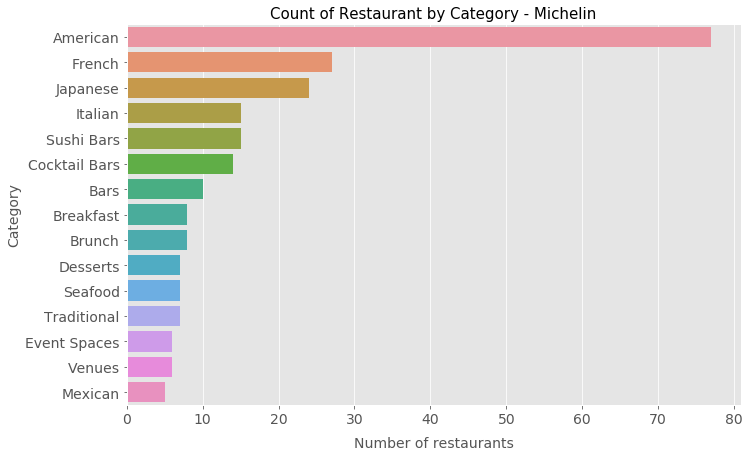

In [18]:
get_count_plot(cat_m,'Count of Restaurant by Category - Michelin')

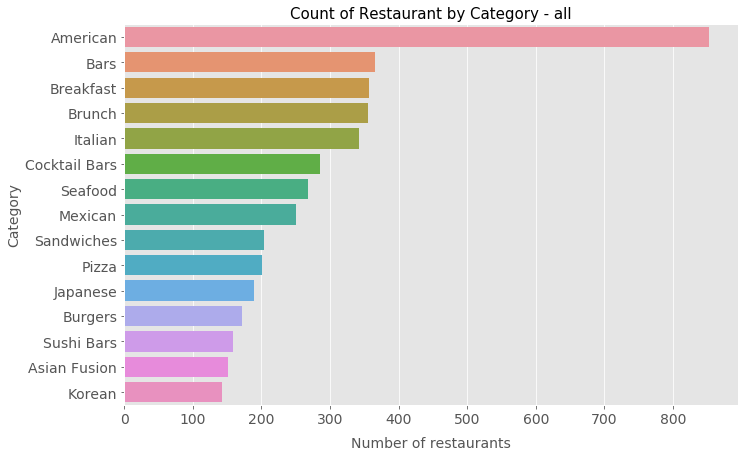

In [19]:
get_count_plot(cat,'Count of Restaurant by Category - all')

Distribution by area (map and plot)

In [20]:
#prepare data
x = res.set_index('name')
xm = x[x['Michelin']>0]

In [21]:
#get highest star
mich_1 = df_michelin.set_index('name').drop(['borough', 'city','Name'], axis=1)
mich_1['hi_star'] = mich_1.max(axis=1)
mich_hi_star = mich_1[['hi_star']]

In [22]:
x_1 = x[['city']].join(mich_hi_star, how = 'inner')
x_1 = x_1.reset_index()
#get count by stars
count_mich_bystar= x_1[['name','hi_star']].groupby(['hi_star']).count()

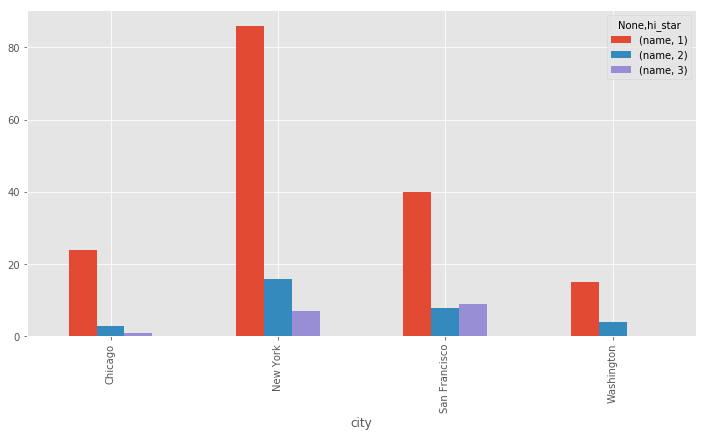

In [23]:
# get the bar plot
count_city = x_1.groupby(['city','hi_star'])
count_city.count().unstack().plot(kind='bar',figsize=(12,6))

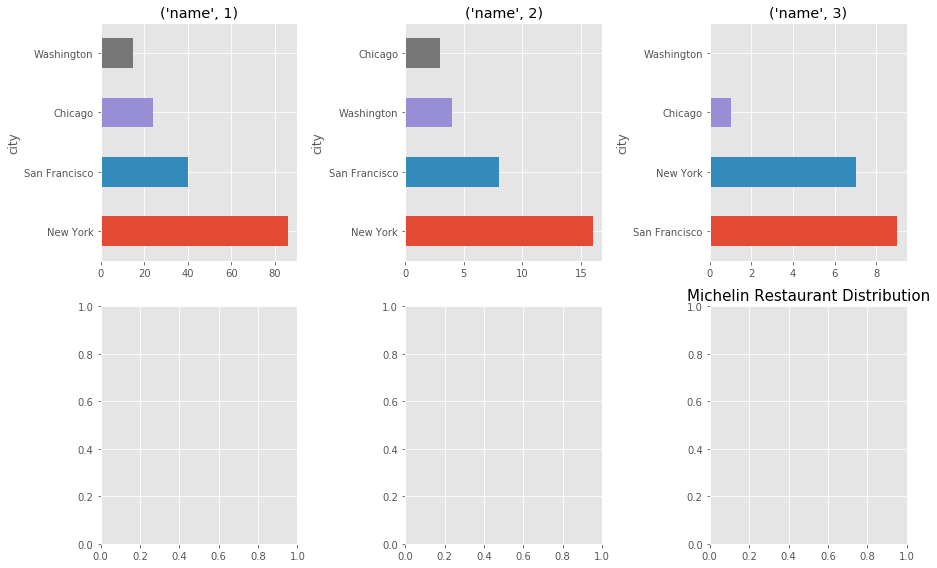

In [26]:
COL_NUM = 3
ROW_NUM = 2
count_city = x_1.groupby(['city','hi_star']).count().unstack()
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(13,8))

for i, (star, res_count) in enumerate(count_city.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    res_count = res_count.sort_values(ascending=False)[:5] 
    res_count.plot(kind='barh', ax=ax)
    ax.set_title(star)
plt.title('Michelin Restaurant Distribution', fontsize=15)
plt.tight_layout() 

In [27]:
res_rating = res[['name','rating']].set_index('name')

star distribution by rating

In [28]:
rating_profile = res_rating.join(mich_hi_star, how = 'left').fillna(0).groupby('hi_star')

c_0 = rating_profile.get_group(0)['rating'].values
c_1 = rating_profile.get_group(1)['rating'].values
c_2 = rating_profile.get_group(2)['rating'].values
c_3 = rating_profile.get_group(3)['rating'].values
c_0.mean()
data_toplot = [c_0,c_1,c_2,c_3]

In [29]:
res_review = x[['rating','review_count']]
res_review_m = xm[['rating','review_count']]
res_review.join(mich_hi_star, how = 'inner')[['review_count','hi_star']].groupby('hi_star').mean()

,review_count
hi_star,
1,718.339394
2,499.451613
3,1217.352941


In [30]:
#ax = sns.boxplot(x="hi_star", y="rating", data=res_rating.join(mich_hi_star, how = 'left').fillna(0))

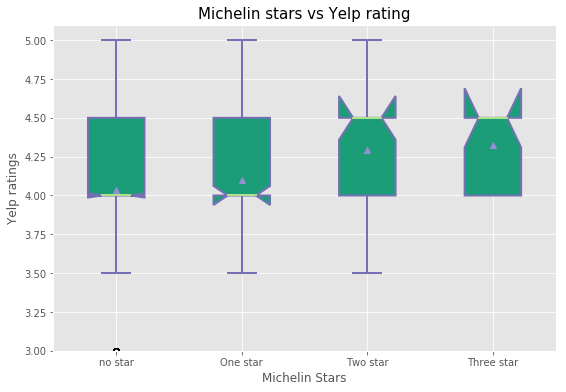

In [31]:
#get plots
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_toplot,1,patch_artist=True,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_xticklabels(['no star', 'One star', 'Two star', 'Three star'])
ax.set_xlabel('Michelin Stars')
ax.set_ylabel('Yelp ratings')
plt.ylim((3,5.1))
plt.title('Michelin stars vs Yelp rating', fontsize=15)
plt.show()

Review distribution by rating

In [32]:
review_rating = res_review.groupby('rating').sum()

Text(0.5, 1.0, 'Yelp rating with number of reviews - all')

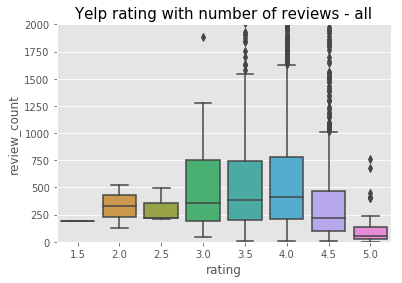

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#sns.barplot(x="rating", y="review_count", data=res_review)
ax = sns.boxplot(x="rating", y="review_count", data=res_review)


plt.ylim((0,2000))
plt.title('Yelp rating with number of reviews - all', fontsize=15)

Text(0.5, 1.0, 'Yelp rating with number of reviews - Michelin')

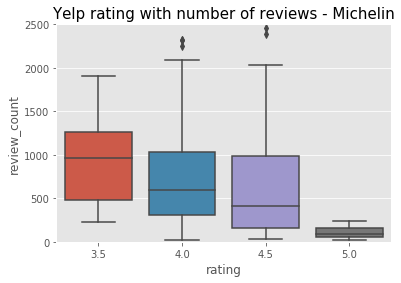

In [34]:
#sns.barplot(x="rating", y="review_count", data=res_review_m)
sns.boxplot(x="rating", y="review_count", data=res_review_m)
plt.ylim((0,2500))
plt.title('Yelp rating with number of reviews - Michelin', fontsize=15)

In [35]:
a = res_review_m.groupby('rating').mean().unstack()
#avg_review['avg'] = avg_review['rating']*avg_review['review_count']